### About

The [Machine Learning Crash](https://developers.google.com/machine-learning/crash-course/prereqs-and-prework) Course by Google.

Exercise:
* [First Steps with TensorFlow](https://colab.research.google.com/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)

In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from pylab import rcParams
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

C:\Soft\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# global IPython settings

#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
#np.set_printoptions(precision=3)
#np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) # it's a dangerous option

# plt
# rcParams['figure.figsize'] = 30, 15
rcParams['figure.figsize'] = 25, 12

In [48]:
california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

In [4]:
print('\n'.join(california_housing_dataframe.columns))

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value


In [49]:
california_housing_dataframe["median_house_value"]

0        66900.0
1        80100.0
2        85700.0
3        73400.0
4        65500.0
          ...   
16995   111400.0
16996    79000.0
16997   103600.0
16998    85800.0
16999    94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [50]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


In [51]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2002,-117.3,33.2,16.0,1835.0,430.0,599.0,399.0,2.0,87.7
344,-116.9,33.9,34.0,3183.0,738.0,1820.0,647.0,2.2,71.8
12244,-121.5,39.0,40.0,198.0,41.0,151.0,48.0,4.6,100.0
8544,-118.5,34.0,44.0,2146.0,394.0,851.0,355.0,6.5,500.0
11259,-121.1,38.9,21.0,4064.0,871.0,1847.0,859.0,3.0,135.5
...,...,...,...,...,...,...,...,...,...
12322,-121.5,38.6,42.0,1822.0,636.0,1372.0,560.0,1.3,76.0
5108,-118.1,33.8,44.0,1712.0,314.0,691.0,293.0,4.4,221.3
12811,-121.8,37.4,29.0,570.0,76.0,244.0,72.0,12.3,416.7
1828,-117.3,34.1,27.0,2896.0,684.0,1514.0,668.0,1.5,70.2


In [52]:
california_housing_dataframe["median_house_value"]

2002     87.7
344      71.8
12244   100.0
8544    500.0
11259   135.5
         ... 
12322    76.0
5108    221.3
12811   416.7
1828     70.2
9552    225.0
Name: median_house_value, Length: 17000, dtype: float64

In [53]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


6445.0


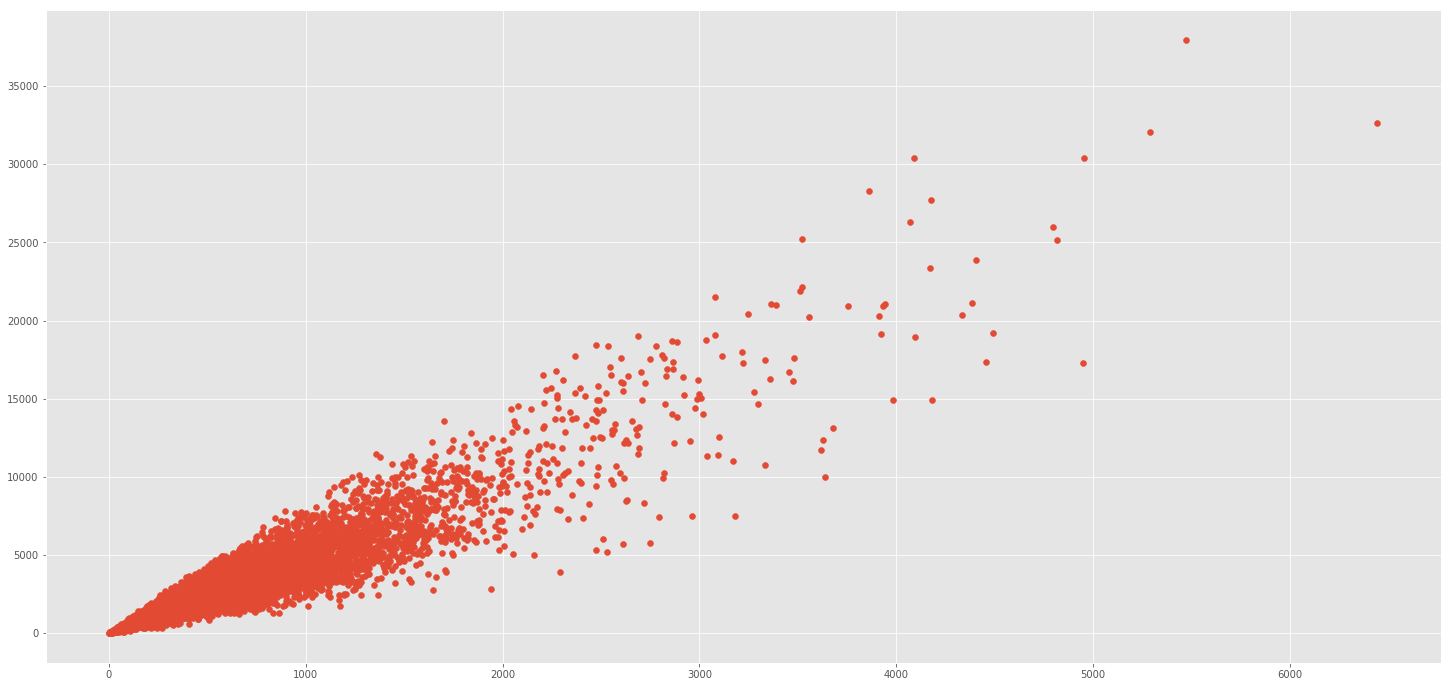

In [7]:
plt.scatter(y = california_housing_dataframe['total_rooms'], x = california_housing_dataframe['total_bedrooms'])
print(max(california_housing_dataframe['total_bedrooms']))

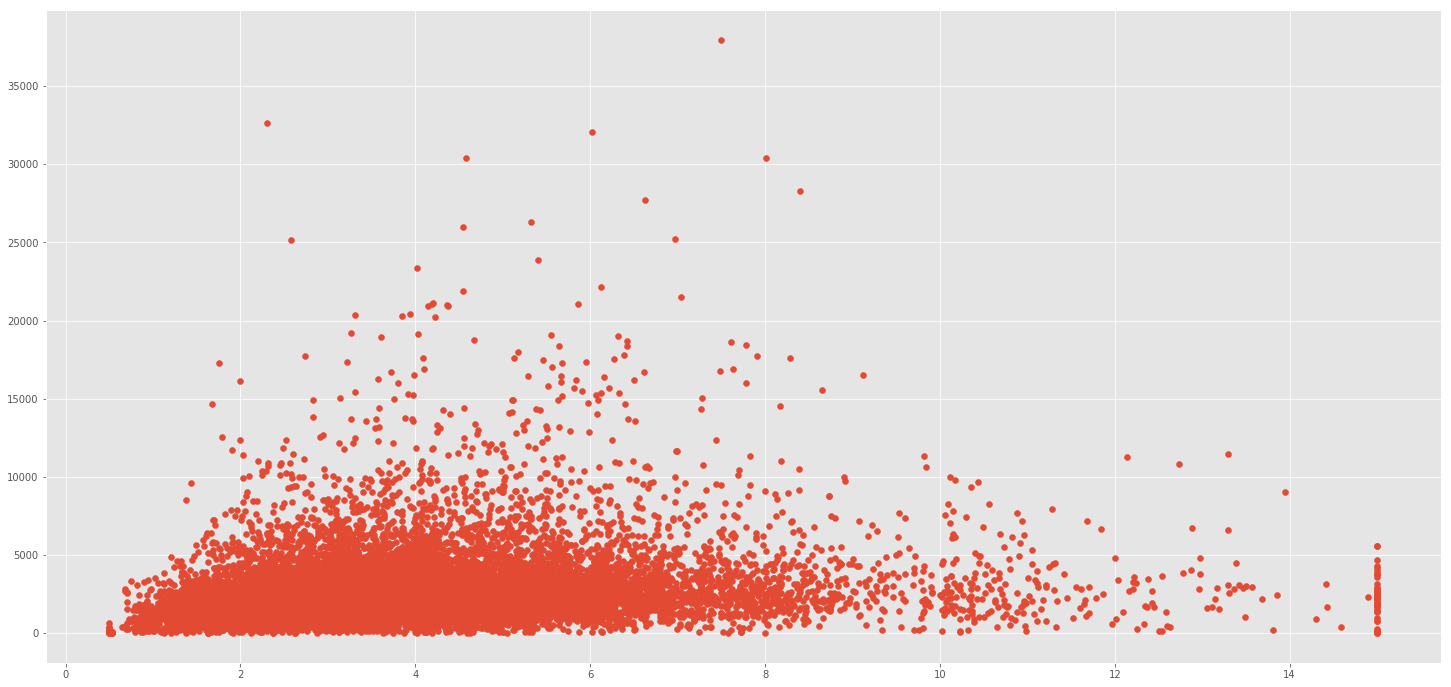

In [8]:
plt.scatter(y = california_housing_dataframe['total_rooms'], x = california_housing_dataframe['median_income'])

In [88]:
# Define the input feature: total_rooms.
my_feature = california_housing_dataframe[["total_rooms"]]

# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]
targets_fs = [tf.feature_column.numeric_column("median_house_value")]
#targets_fs
# for value in feature_columns:
#     print (value)

,key,shape,default_value,dtype,normalizer_fn
0,median_house_value,"(1,)",None,<dtype: 'float32'>,None


In [82]:
# Define the label.
targets = california_housing_dataframe["median_house_value"]

print(california_housing_dataframe["median_house_value"])

2002     87.7
344      71.8
12244   100.0
8544    500.0
11259   135.5
         ... 
12322    76.0
5108    221.3
12811   416.7
1828     70.2
9552    225.0
Name: median_house_value, Length: 17000, dtype: float64


In [83]:
# Use gradient descent as the optimizer for training the model.
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    #feature_columns=feature_columns,
    feature_columns=my_feature,
    optimizer=my_optimizer
)

In [84]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           

    print(features)
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    #print(features, labels)
    return features, labels

In [85]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
    #steps=2
)

{'total_rooms': array([1835., 3183.,  198., ...,  570., 2896.,   52.])}


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [79]:
# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn = lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

print (dir(prediction_input_fn))
# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# for item in predictions:
#     print(item)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0]for item in predictions])

# for item in predictions:
#     print(item)

#predictions = predictions * 1000
#print(predictions)

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print ("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print ("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


ValueError: Could not find trained model in model_dir: C:\Users\VDMITR~1\AppData\Local\Temp\tmpv96zg3o2.

In [70]:
min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print ("Min. Median House Value: %0.3f" % min_house_value)
print ("Max. Median House Value: %0.3f" % max_house_value)
print ("Difference between Min. and Max.: %0.3f" % min_max_difference)
print ("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 237.424


In [65]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,0.0,17000.0
mean,nan,207.3
std,nan,116.0
min,nan,15.0
25%,nan,119.4
50%,nan,180.4
75%,nan,265.0
max,nan,500.0


In [66]:
calibration_data.head()

,predictions,targets
2002,nan,87.7
344,nan,71.8
12244,nan,100.0
8544,nan,500.0
11259,nan,135.5


In [ ]:
calibration_data.plot()

In [19]:
sample = california_housing_dataframe.sample(n=300)

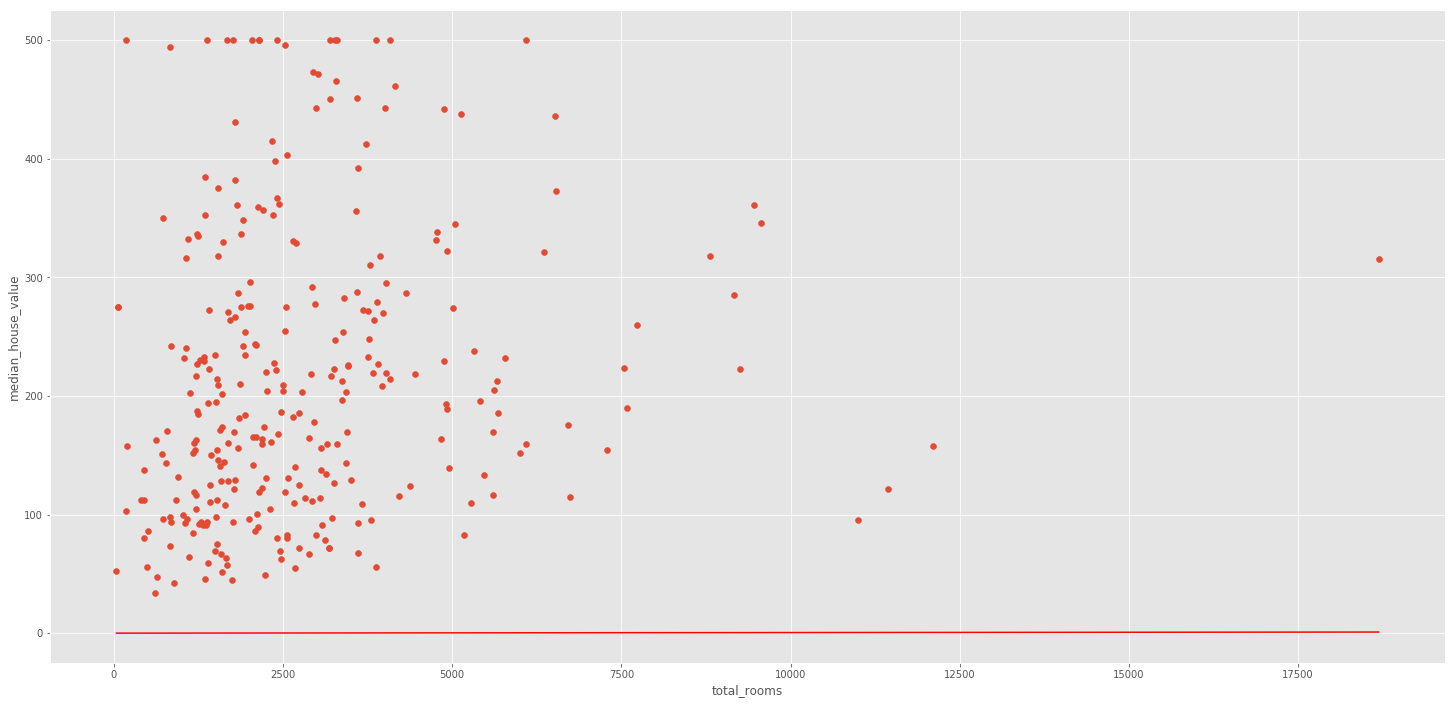

In [20]:
# Get the min and max total_rooms values.
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Display graph.
plt.show()